<a href="https://colab.research.google.com/github/Arjunb79/DS-ML-LAB/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sonar data.csv")

In [ ]:
dataset

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [ ]:
scalar.fit(dataset.drop('R',axis=1))

StandardScaler()

In [ ]:
sf=scalar.transform(dataset.drop('R',axis=1))


In [ ]:
new_dataset=pd.DataFrame(sf,columns=dataset.columns[:-1])

In [ ]:
new_dataset

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.700189,0.420421,1.052950,0.319501,0.777810,2.600518,1.522475,2.506911,1.324632,0.587392,...,-0.294569,-0.528057,-0.259343,-0.838780,0.014044,1.913786,1.084838,-0.470938,-0.442688,-0.422461
1,-0.130894,0.599427,1.719130,1.167351,0.401466,2.087862,1.967839,2.847551,3.240336,3.058831,...,-1.061350,1.012809,0.832198,-0.194293,1.227682,2.842696,4.150049,1.306561,0.252998,0.254053
2,-0.835792,-0.647546,0.480451,-0.722021,-0.983262,-1.147115,-0.190961,-0.083126,-0.996071,-0.608898,...,0.672242,-0.142840,-1.010664,0.559893,-0.112965,-0.154353,-0.482599,-0.548221,-0.636834,1.030055
3,2.044717,0.854283,0.110929,-0.315311,-0.289998,-0.671681,-0.011196,1.315846,1.516965,1.768058,...,-0.036197,-1.079853,-0.755498,-0.057168,0.239837,-1.170895,-0.099448,-0.486395,0.447143,0.572413
4,-0.026465,0.208041,-0.419933,-0.788730,-0.660939,-0.094732,-0.024152,0.571138,0.280782,0.711633,...,-0.469595,-0.934096,-1.322533,-0.975905,-1.129034,0.126073,-0.360687,-0.810982,-0.458867,-0.064306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.457236,-0.116596,-0.703580,-0.782275,-0.644733,0.988106,1.315179,0.407865,0.469725,0.447527,...,0.355528,-0.194897,-0.131760,1.231805,-0.846792,0.336392,-0.221359,0.549192,1.838517,1.825954
203,0.134531,-0.859926,-0.365285,0.050513,0.016119,-0.148874,-0.365867,-0.386178,-0.630046,0.053227,...,-0.911327,-0.767516,-0.202639,0.354206,-0.423430,-0.329619,-0.761255,-0.733699,-0.280901,0.035181
204,1.000424,0.159497,-0.672353,-0.534806,-0.720362,0.211508,0.066541,-0.198238,-0.436866,0.332213,...,-0.044532,0.263199,-1.109895,-0.797643,-0.437542,0.126073,1.084838,0.904691,-0.038219,-0.681128
205,0.047506,-0.095358,0.134350,0.145196,-1.051689,0.521132,0.403398,-0.262842,0.145217,0.202020,...,-0.986338,-0.507234,-0.868905,0.230794,-0.804456,-0.820363,-0.761255,-0.007243,-0.701549,-0.342871


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
x=new_dataset
y=dataset['R']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:

x_train.shape

(144, 60)

In [ ]:
y_test.shape

(63,)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,pred))


[[30  6]
 [ 5 22]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.86      0.83      0.85        36
           R       0.79      0.81      0.80        27

    accuracy                           0.83        63
   macro avg       0.82      0.82      0.82        63
weighted avg       0.83      0.83      0.83        63



In [ ]:
er=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred=knn.predict(x_test)
  er.append(np.mean(pred!=y_test))


Text(0, 0.5, 'error rate')

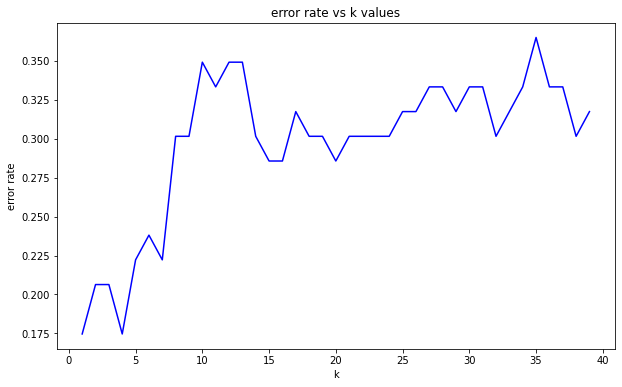

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),er,color='blue')
plt.title('error rate vs k values')
plt.xlabel('k')
plt.ylabel('error rate')